# Assignment #1 - Deep Neural Network

<font color="red"> <b> Due: Feb 13 (Friday) 11:00 pm </b> </font>

<font color="blue"> Abeoseh Flemister </font>

# Introduction

[General introduction of this writing assignment] Describe the objective of this assignment. You can briefly state how you accompilsh it.

#### Classification: [buy now pay later Repayment status](https://www.kaggle.com/datasets/bhanageviraj/buy-now-pay-later-bnpl-dataset?resource=download)

My objective is to build a deep neural network to analyze defaults with buy now pay later data (BNPL). I am classifying people as either Defaulted, Paid On Time, Late Payment using a multilayer perceptron.

|  |  |  |  |
|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 50000 | 
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 7 | 
| Associated Tasks: | Classification, Regression | Missing Values? | none | 


#### Regression: [Determine Possum head length](https://www.kaggle.com/datasets/abrambeyer/openintro-possum)

My objective is to build a deep neural network to determine possum head length. 
|  |  |  |  |
|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 104 | 
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 13 | 
| Associated Tasks: | Classification, Regression | Missing Values? | 3 | 


**a couple of sentences for the intro, a paragraph or two for the other sections**

# Data

**Introduce** your data and **visualize** them. Describe your observations about the data.
You can reuse some of your codes and plots from the previous assignment.

NOTE: You need to select two datasets, one for regression and the other for classification so you can practice your models to it.

**Please do not use the data we practiced in the lab. Also, make sure to play with a large enough data so you can have reasonable observation/analysis.**



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)
import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')


TF version: 2.20.0


## Classification: BNPL

In [36]:
bnpl = pd.read_csv("bnpl_dataset.csv") 
bnpl.shape

(50000, 9)

Check how many NA values exist. There are no missing values.

In [10]:
bnpl.isna().sum()

Transaction_ID       0
Customer_Age         0
Gender               0
Annual_Income        0
Credit_Score         0
Purchase_Category    0
BNPL_Provider        0
Purchase_Amount      0
Repayment_Status     0
dtype: int64

In [13]:
print(bnpl[['Gender', 'Purchase_Category', 'BNPL_Provider', "Repayment_Status"]].apply(lambda col: col.unique()))
print(bnpl[['Gender', 'Purchase_Category', 'BNPL_Provider', "Repayment_Status"]].apply(lambda col: len(col.unique())))

Gender                                      [Male, Female, Non-Binary]
Purchase_Category    [Beauty, Groceries, Travel, Fashion, Home & Fu...
BNPL_Provider                       [Sezzle, Affirm, Klarna, Afterpay]
Repayment_Status               [Defaulted, Paid On Time, Late Payment]
dtype: object
Gender               3
Purchase_Category    6
BNPL_Provider        4
Repayment_Status     3
dtype: int64


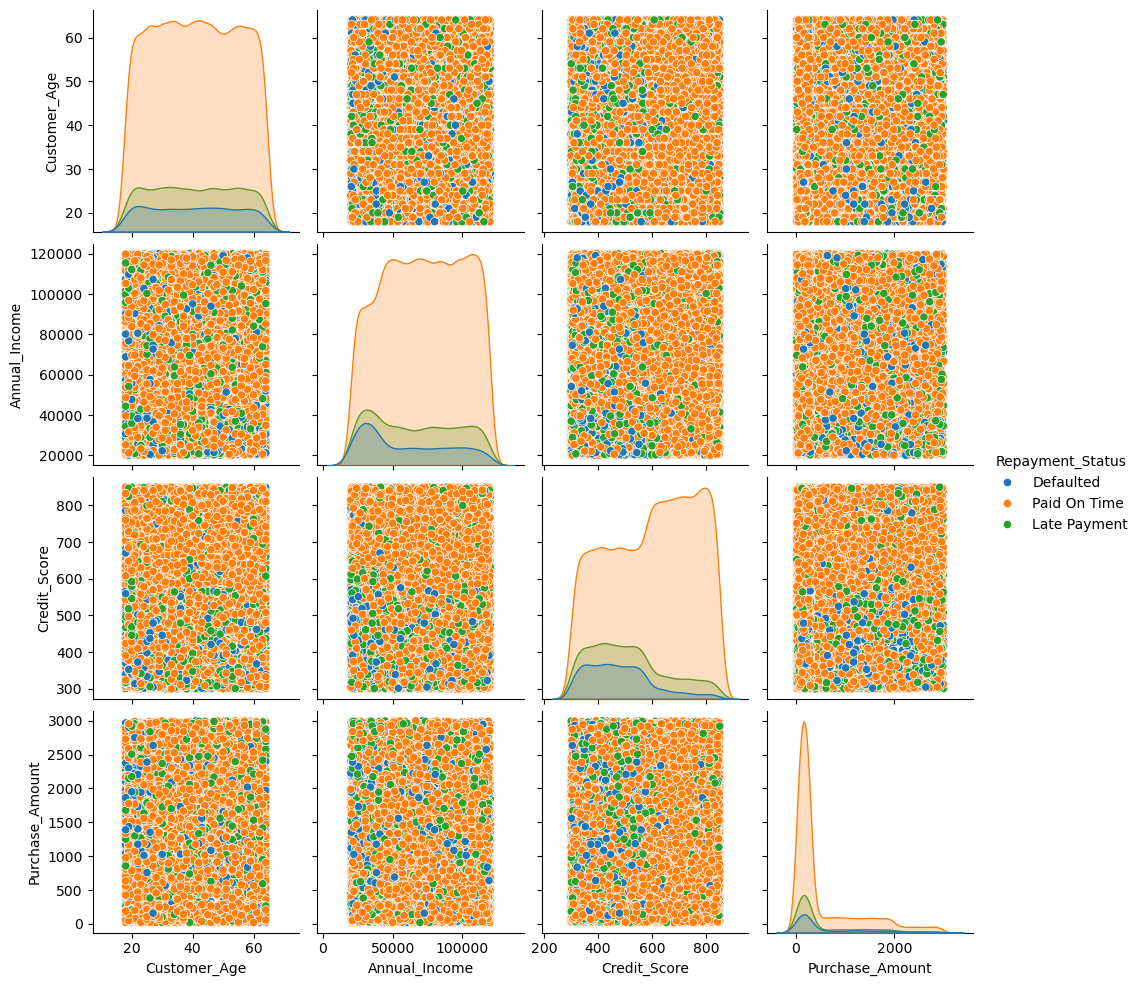

In [6]:
selected_columns = bnpl[['Customer_Age', 'Annual_Income', 'Credit_Score', 'Purchase_Amount', "Repayment_Status"]]

sns.pairplot(selected_columns, diag_kind="kde", hue = "Repayment_Status")

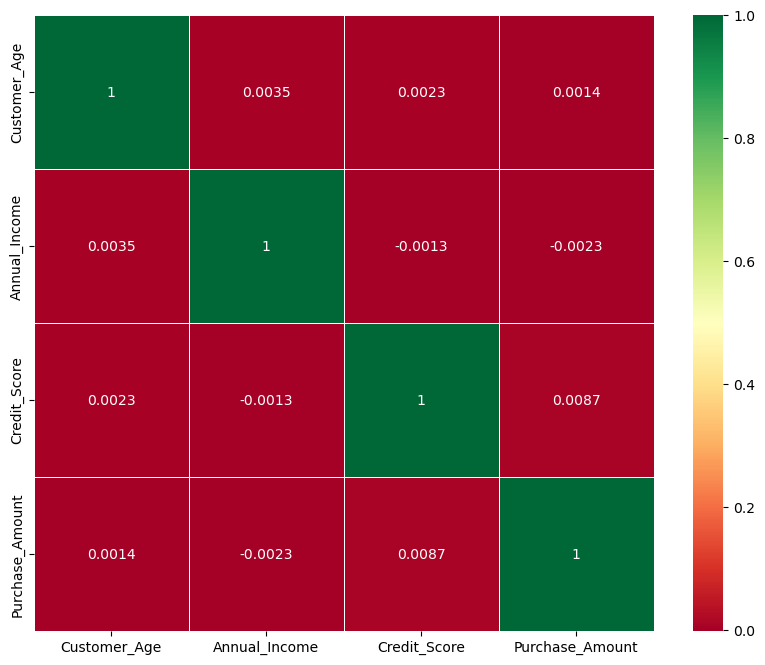

In [7]:
selected_columns = bnpl[['Customer_Age', 'Annual_Income', 'Credit_Score', 'Purchase_Amount']]

# Create a correlation matrix
corr = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

Encode and split the data

In [35]:
bnpl.columns

Index(['Transaction_ID', 'Customer_Age', 'Annual_Income', 'Credit_Score',
       'Purchase_Amount', 'Repayment_Status', 'Female', 'Male', 'Non-Binary',
       'Beauty', 'Electronics', 'Fashion', 'Groceries', 'Home & Furniture',
       'Travel', 'Affirm', 'Afterpay', 'Klarna', 'Sezzle'],
      dtype='object')

In [ ]:
for col in ['Gender', 'Purchase_Category', 'BNPL_Provider']:
    bnpl = pd.concat([bnpl, pd.get_dummies(bnpl[col])], axis = 1).drop([col], axis = 1)
    # bnpl[col] = bnpl[col].astype(int)

bnpl = bnpl.drop("Transaction_ID", axis = 1)

In [41]:
boolean_columns = bnpl.select_dtypes(include='bool').columns.to_list()

bnpl[boolean_columns] = bnpl[boolean_columns].astype(int)

bnpl

,Customer_Age,Annual_Income,Credit_Score,Purchase_Amount,Repayment_Status,Female,Male,Non-Binary,Beauty,Electronics,Fashion,Groceries,Home & Furniture,Travel,Affirm,Afterpay,Klarna,Sezzle
0,56,32293,353,249,Defaulted,0,1,0,1,0,0,0,0,0,0,0,0,1
1,46,72774,354,188,Paid On Time,0,1,0,0,0,0,1,0,0,1,0,0,0
2,32,82207,630,1610,Paid On Time,0,1,0,0,0,0,0,0,1,0,0,0,1
3,60,92498,470,120,Paid On Time,0,1,0,0,0,1,0,0,0,0,0,0,1
4,25,32060,502,1849,Paid On Time,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,60,78276,543,262,Paid On Time,0,1,0,0,0,0,1,0,0,0,0,1,0
49996,46,40989,828,263,Paid On Time,1,0,0,0,0,1,0,0,0,0,0,0,1
49997,19,64502,648,1777,Paid On Time,1,0,0,0,0,0,0,0,1,1,0,0,0
49998,43,44026,481,1648,Paid On Time,0,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
bnpl_train_data = bnpl.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
bnpl_test_data = bnpl.drop(bnpl_train_data.index)

bnpl_x_train = bnpl_train_data.copy()
bnpl_x_test = bnpl_test_data.copy()

bnpl_y_train = bnpl_x_train.pop('Repayment_Status')
bnpl_y_test = bnpl_x_test.pop('Repayment_Status')

bnpl_y_train = to_categorical(np.asarray(bnpl_y_train.factorize()[0]))
bnpl_y_test = to_categorical(np.asarray(bnpl_y_test.factorize()[0]))

bnpl_train_data.shape, bnpl_test_data.shape

((40000, 18), (10000, 18))

## Regression: Possum

In [68]:
possum = pd.read_csv("possum.xls").drop("case", axis = 1)
possum.shape

(104, 13)

Check how many NA values exist. There are two missing values in age and one in foot length.

In [69]:
print("Checking the amount of NA values in each column")
display(possum.isna().sum())

print("Displaying the rows with NA values")
display(possum[possum["age"].isna() | possum["footlgth"].isna()])

possum = possum.dropna()

print("Checking the amount of NA values in each column after removing the 3 rows with NA")
display(possum.isna().sum())

Checking the amount of NA values in each column


site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Displaying the rows with NA values


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


Checking the amount of NA values in each column after removing the 3 rows with NA


site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [70]:
print("Unique values in each categorical column.")
print(possum[['site', 'Pop', 'sex']].apply(lambda col: col.unique()))
print("Amount of unique values in each categorical column.")
print(possum[['site', 'Pop', 'sex']].apply(lambda col: len(col.unique())))

Unique values in each categorical column.
site    [1, 2, 3, 4, 5, 6, 7]
Pop              [Vic, other]
sex                    [m, f]
dtype: object
Amount of unique values in each categorical column.
site    7
Pop     2
sex     2
dtype: int64


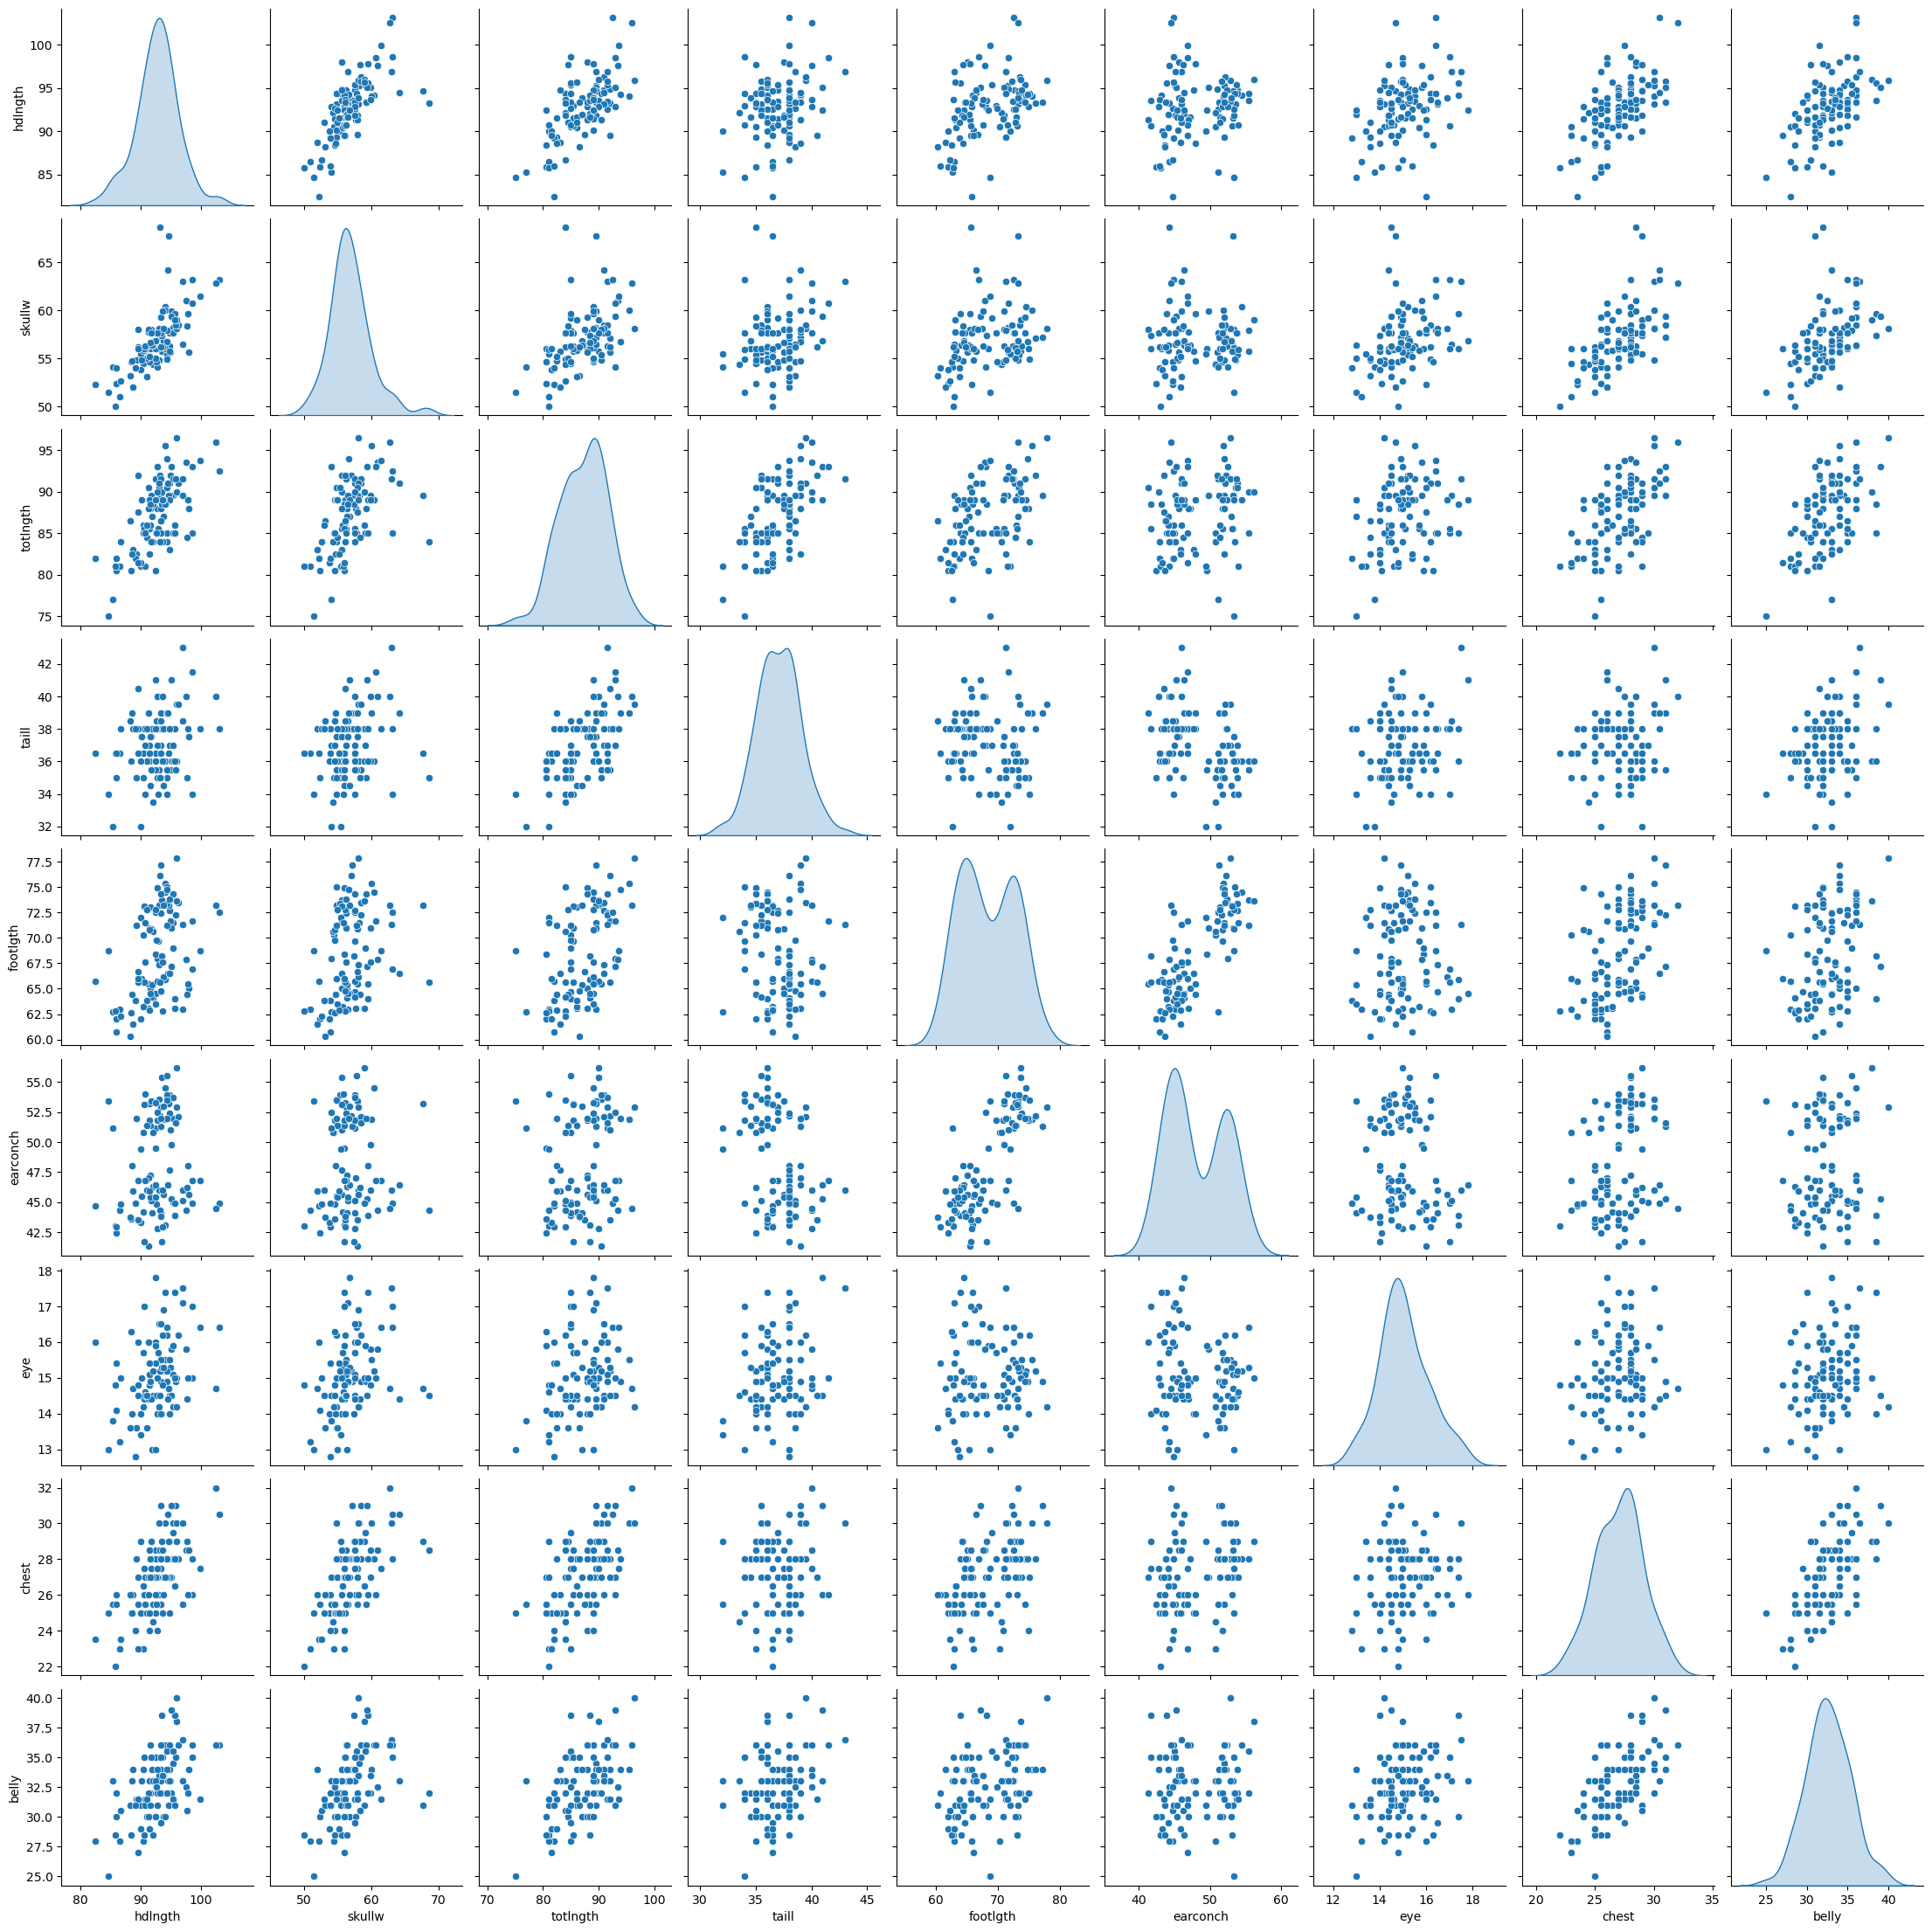

In [ ]:
selected_columns = possum[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]]

sns.pairplot(selected_columns, diag_kind="kde")

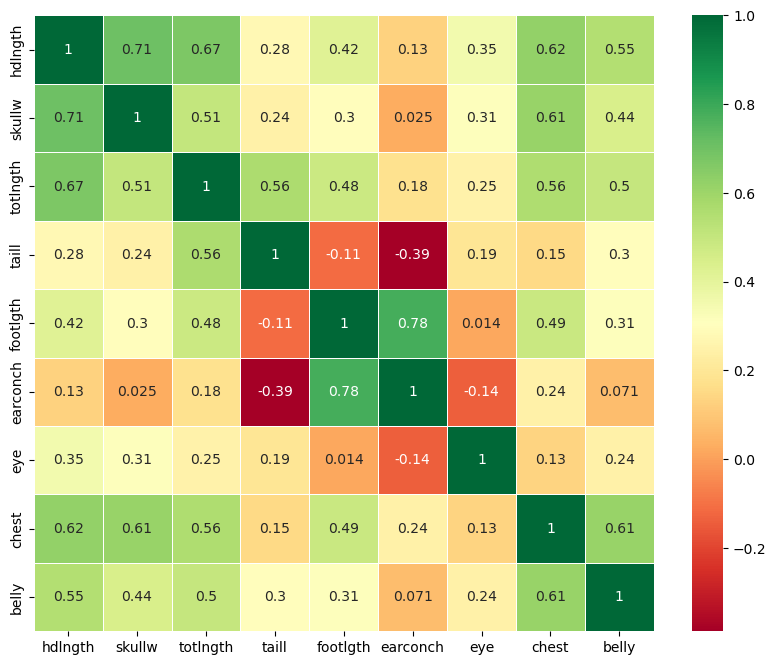

In [73]:
selected_columns = possum[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]]

# Create a correlation matrix
corr = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

Encode and split the data

In [78]:
for col in ['site', 'Pop', 'sex']:
    possum = pd.concat([possum, pd.get_dummies(possum[col])], axis = 1).drop([col], axis = 1)


In [80]:
boolean_columns = possum.select_dtypes(include='bool').columns.to_list()

possum[boolean_columns] = possum[boolean_columns].astype(int)

possum

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,2,3,4,5,6,7,Vic,other,f,m
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,...,0,0,0,0,0,0,1,0,0,1
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,...,0,0,0,0,0,0,1,0,1,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,...,0,0,0,0,0,0,1,0,1,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,...,0,0,0,0,0,0,1,0,1,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,...,0,0,0,0,0,1,0,1,0,1
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,...,0,0,0,0,0,1,0,1,0,1
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,...,0,0,0,0,0,1,0,1,1,0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
possum_train_data = possum.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
possum_test_data = possum.drop(possum_train_data.index)

possum_x_train = possum_train_data.copy()
possum_x_test = possum_test_data.copy()

possum_y_train = possum_x_train.pop('hdlngth')
possum_y_test = possum_x_test.pop('hdlngth')

possum_train_data.shape, possum_test_data.shape

((81, 21), (20, 21))

# Method

Summarize your deep neural network model architectures and component selections for regression and classification here. **Explain** your choice of model and your implementation.
Use the subclass models to create `MLPRegress` and `MLPClassify` classes.  

NOTE: We do not consider comments in the code cell as a proper writing. Make sure explain in a Markdown cell not regardless the comment in the code cell.


### Helper functions

In [44]:
def plot_learning(history, label: str, metric, val_metric):
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[val_metric], label=val_metric)
    plt.xlabel('Epoch')
    plt.ylabel(f'Error [{label}]')
    plt.legend()

## Categorical

In [45]:
class Normalizer(keras.Model):
    """Save the normalizer."""

    def __init__(self, x_train):
        super().__init__()
        self.normalizer = keras.layers.Normalization()
        self.normalizer.adapt(x_train)

        print(self.normalizer)

    def call(self, inputs):
        return self.normalizer(inputs)


class NetworkLayers(keras.Model):
    """Normalize -> Hidden -> Output."""

    def __init__(self, n_hidden, n_output, activ_hidden,activ_output, dropout):
        super().__init__()

        self.hidden = keras.layers.Dense(n_hidden, activation = activ_hidden)
        self.hidden_dropout = keras.layers.Dropout(dropout, noise_shape=None, seed=None)      
        self.out = keras.layers.Dense(n_output, activation = activ_output)


    def call(self, inputs, training = False):
        """Forward"""
        
        x = self.hidden(inputs)
        x = self.hidden_dropout(x, training = training)
        return self.out(x)


class MLP(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self, x_train, n_hidden, n_output, activ_hidden,activ_output, dropout):
        super().__init__()
        self.normalizer = Normalizer(x_train)
        self.DenseLayers = NetworkLayers(n_hidden, n_output, activ_hidden,activ_output, dropout)

    def call(self, inputs):
        x = self.normalizer(inputs)
         
        return self.DenseLayers(x)


## Regression

In [85]:
class LinearMLP:
    
    def __init__(self, x_train):

        normalizer = keras.layers.Normalization()
        normalizer.adapt(x_train)

        self.linear_model = keras.Sequential(
            [normalizer,
            keras.layers.Dense(64, activation = "relu"),
            keras.layers.Dense(64, activation = "relu"),
            keras.layers.Dense(1),
        ])
    def call(self, inputs):
        return self.linear_model(inputs)



# Experiments

Apply your MLP instances to the two datasets and discuss the results.
Use a proper visualization of results to enhance your observation and related discussions.
Don't forget to explain your experiments and related codes.

**Don't forget to analyze your observations and discuss about them. **
You may have subsections of results and discussions here.


## Categorical

<Normalization name=normalization_1, built=True>
CPU times: total: 11min 45s
Wall time: 9min 8s


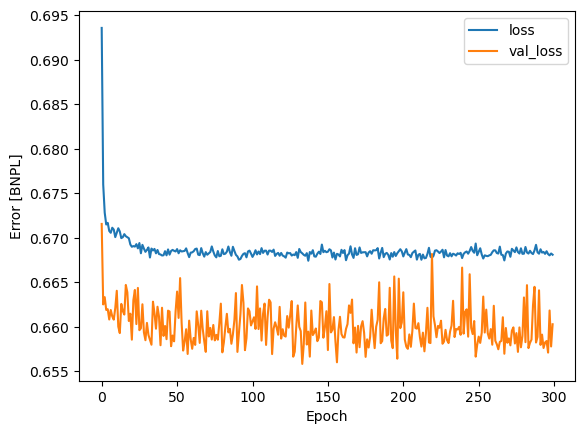

In [ ]:
%%time

bnpl_model = MLP(bnpl_x_train.to_numpy(), n_hidden=8, n_output=3, dropout = 0.2, activ_hidden = "relu",activ_output = "softmax")
bnpl_optimizer = keras.optimizers.Adam(learning_rate=1e-2)
bnpl_model.compile(bnpl_optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])


# model.fit(x_train.to_numpy(), y_train.to_numpy(), epochs=300)

bnpl_history = bnpl_model.fit(x = bnpl_x_train.to_numpy(), y = bnpl_y_train, epochs = 300,
                verbose = 0, validation_split = 0.2)

plot_learning(bnpl_history, "BNPL", "loss", "val_loss")

Evaluate and Predict

In [ ]:
bnpl_model.evaluate(bnpl_x_test, bnpl_y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7588 - loss: 0.6497


[0.6496502161026001, 0.7588000297546387]

In [ ]:
bnpl_model.predict(bnpl_x_test), bnpl_y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


(array([[0.8670966 , 0.10048573, 0.03241763],
        [0.84361225, 0.11551158, 0.04087609],
        [0.8569977 , 0.10701765, 0.0359847 ],
        ...,
        [0.7295899 , 0.18120411, 0.08920597],
        [0.6921681 , 0.20041154, 0.10742035],
        [0.6921681 , 0.20041154, 0.10742035]], dtype=float32),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

## Regression

In [87]:
possum_model = LinearMLP(possum_x_train.to_numpy())
possum_optimizer = keras.optimizers.SGD(learning_rate=0.1)
possum_model.linear_model.compile(optimizer = possum_optimizer, loss="mean_absolute_error")


# model.fit(x_train.to_numpy(), y_train.to_numpy(), epochs=300)

possum_history = possum_model.linear_model.fit(x = possum_x_train.to_numpy(), y = possum_y_train, epochs = 300,
                verbose = 0, validation_split = 0.2)

plot_learning(possum_history, "possum", "loss", "val_loss")

KeyboardInterrupt: 

In [ ]:
possum_model.evaluate(possum_x_test, possum_y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7588 - loss: 0.6497


[0.6496502161026001, 0.7588000297546387]

: 

In [ ]:
model.predict(possum_x_test), possum_y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


(array([[0.8670966 , 0.10048573, 0.03241763],
        [0.84361225, 0.11551158, 0.04087609],
        [0.8569977 , 0.10701765, 0.0359847 ],
        ...,
        [0.7295899 , 0.18120411, 0.08920597],
        [0.6921681 , 0.20041154, 0.10742035],
        [0.6921681 , 0.20041154, 0.10742035]], dtype=float32),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

# Conclusions

Discuss the challenges or somethat that you learned.
If you have any suggestion about the assignment, you can write about it.

# References

List your references to complete your assignment. Use a proper reference style (APA, MLA, etc.).

# AI Acknowledgement

"I have not used AI for the assignment." 



## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. **


Points | | Description
--|--|:--
5 | Introduction  
20 | Data |
 | 5| description
 | 5| plots for understanding or analysis
 | 5| preliminary observation
 | 5| Preprocessing of the data
40 | Method |
 | 10| Explanation of deep network architecture and choice of components
 | 10| explanation of codes
 | 20| Correct implementation/Preliminary Test
30 | Experiments |
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis & retesting if need  
5 | Conclusions, References